In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/choyt/MEDS/eds220-env-data/eds220-2024-sections'

In [3]:
# Create absolute file path to data
fp = os.path.join('data', 
                  'earthquakes_shapefile', 
                 'ne_110m_admin_0_countries.shp')

map = gpd.read_file(fp)

# Simplify column names
map.columns = map.columns.str.lower()

map.head(3)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [4]:
earthquakes = pd.read_csv("https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv")

In [5]:
earthquakes.head(3)

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake


In [6]:
earthquakes['time'] = pd.to_datetime(earthquakes.time)

In [7]:
earthquakes.dtypes

time         datetime64[ns]
latitude            float64
longitude           float64
depth               float64
mag                 float64
id                   object
place                object
type                 object
dtype: object

In [8]:
earthquakes['year'] = earthquakes['time'].dt.year

In [9]:
earthquakes_filtered = earthquakes[(earthquakes.year == 2014) & (earthquakes.mag >= 6.5)]

In [10]:
earthquakes_filtered.head()

,time,latitude,longitude,depth,mag,id,place,type,year
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake,2014
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake,2014
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,2014
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake,2014
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake,2014


In [26]:
# Create points from latitude and longitude
points = gpd.points_from_xy(earthquakes_filtered.longitude, 
                            earthquakes_filtered.latitude)
points

# Create a geodataframe
earthquakes_mag = gpd.GeoDataFrame(earthquakes_filtered,
                                geometry = points,
                                crs = 'WGS84')

earthquakes_mag.head(3)

,time,latitude,longitude,depth,mag,id,place,type,year,geometry
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake,2014,POINT (167.24900 -13.86330)
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake,2014,POINT (-58.92720 14.66820)
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,2014,POINT (82.58640 35.90530)


In [27]:
map.crs == earthquakes_mag.crs

True

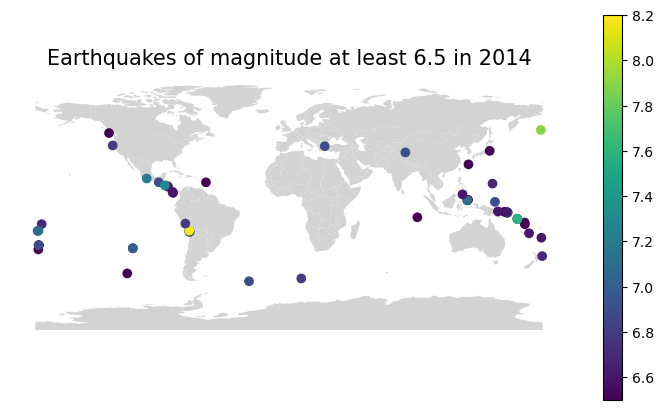

In [45]:
fig, ax = plt.subplots(figsize = (9,5)) # in inches

# Remove axis for a cleaner map
ax.axis('off')

ax.set_title('Earthquakes of magnitude at least 6.5 in 2014', fontsize = 15)

map.plot(ax = ax,
               color = 'lightgray')
    
earthquakes_mag.plot(ax = ax,
                    column = "mag",
                    legend = True)
plt.show()

In [ ]:
# Add electric color power plants colored by energy source
earthquakes_filtered.plot(ax = ax,
                 column = "mag", # color by values in ths column
                 legend = True,
                 markersize = 4,
                 cmap = 'tab20', # color scheme
                 alpha = 0.5
                 )

legend_kwds = {
                      'title': 'moment magnitude',
                      'title_fontsize' : 'small',
                      'loc' : 'upper left',
                      'bbox_to_anchor' : (0,0)